## 本模型利用逻辑回归模型数据清洗后的数据application_data_cleaning.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv('E:\\大三汇丰课程\\大三下\\机器学习（汇丰）\\用户申请评分卡\\输出数据\\application_data_cleaning.csv')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,-273.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,-1909.0,1,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,-322.0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#非数值型变量
sta = data.describe().columns
li = []
for i in data.columns:
    if i not in sta:
        li.append(i)
li

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [4]:
#查看非数值型变量缺失率
for i in li:
    (data[[i]].isnull().sum()/len(data))*100
#NAME_TYPE_SUITE、OCCUPATION_TYPE和EMERGENCYSTATE_MODE存在数据缺失

NAME_CONTRACT_TYPE    0.0
dtype: float64

CODE_GENDER    0.0
dtype: float64

FLAG_OWN_CAR    0.0
dtype: float64

FLAG_OWN_REALTY    0.0
dtype: float64

NAME_TYPE_SUITE    0.420148
dtype: float64

NAME_INCOME_TYPE    0.0
dtype: float64

NAME_EDUCATION_TYPE    0.0
dtype: float64

NAME_FAMILY_STATUS    0.0
dtype: float64

NAME_HOUSING_TYPE    0.0
dtype: float64

OCCUPATION_TYPE    31.345545
dtype: float64

WEEKDAY_APPR_PROCESS_START    0.0
dtype: float64

ORGANIZATION_TYPE    0.0
dtype: float64

EMERGENCYSTATE_MODE    47.398304
dtype: float64

In [5]:
#对以上三个存在缺失值的非数值型数据采用手动填充
# 填充分类变量（基于TransformerMixin的自定义填充器，用众数填充）
from sklearn.base import TransformerMixin
class CustomCategoryzImputer(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        
    def transform(self, df):
        X = df.copy()
        for col in self.cols:
            X[col].fillna(X[col].value_counts().index[0], inplace=True)
        return X
    
    def fit(self, *_):
        return self
    
# 调用自定义的填充器
cci = CustomCategoryzImputer(cols=['NAME_TYPE_SUITE','OCCUPATION_TYPE','EMERGENCYSTATE_MODE'])
temp = cci.fit_transform(data[['NAME_TYPE_SUITE','OCCUPATION_TYPE','EMERGENCYSTATE_MODE']])
data[['NAME_TYPE_SUITE']] = temp[['NAME_TYPE_SUITE']]
data[['OCCUPATION_TYPE']] = temp[['OCCUPATION_TYPE']]
data[['EMERGENCYSTATE_MODE']] = temp[['EMERGENCYSTATE_MODE']]

In [6]:
#把非数值型变量转换为数值型
for col in li :
    ratios = data.groupby(col).apply(lambda x: x['TARGET'].sum() / x['TARGET'].count()).reset_index()
    ratios.columns = [col, 'TEMP']
    ratios=ratios.sort_values(by = 'TEMP')
    liste=ratios[col].values.tolist()
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.reorder_categories(liste,ordered=True)
    data[col] = data[col].cat.codes

In [7]:
data.describe().T.assign(missing_rate = data.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_rate
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05,0.000000
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00,0.000000
NAME_CONTRACT_TYPE,307511.0,0.904787,0.293509,0.00000,1.000000,1.00000,1.000000,1.000000e+00,0.000000
CODE_GENDER,307511.0,1.341630,0.474284,0.00000,1.000000,1.00000,2.000000,2.000000e+00,0.000000
FLAG_OWN_CAR,307511.0,0.659892,0.473746,0.00000,0.000000,1.00000,1.000000,1.000000e+00,0.000000
FLAG_OWN_REALTY,307511.0,0.306327,0.460968,0.00000,0.000000,0.00000,1.000000,1.000000e+00,0.000000
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01,0.000000
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08,0.000000
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06,0.000000
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05,0.000039


## 缺失值处理：随机森林

In [8]:
#筛选有缺失值的列
missing_col = []
for i in data.columns:
    if data[i].isnull().any() == True:
        missing_col.append(i)
missing_col

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [9]:
#筛选未缺失的列
not_missing_col = []
for i in data.columns:
    if i not in ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
                 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                 'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','EMERGENCYSTATE_MODE','AMT_ANNUITY','AMT_GOODS_PRICE',
                 'CNT_FAM_MEMBERS','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE',
                 'YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                 'AMT_REQ_CREDIT_BUREAU_YEAR']:
        not_missing_col.append(i)
not_missing_col.remove('SK_ID_CURR')
not_missing_col.remove('TARGET')
not_missing_col

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3']

#根据未缺失的填补缺失的

In [10]:
#决策树填充'AMT_ANNUITY'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['AMT_ANNUITY'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.AMT_ANNUITY.notnull()].as_matrix()
    unknown = process_df[process_df.AMT_ANNUITY.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.AMT_ANNUITY.isnull()), 'AMT_ANNUITY'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [24209. 24209. 34489. 18557. 18923. 14524. 10065. 34489. 28429. 34489.
 28399. 42989.]


In [11]:
#决策树填充'AMT_GOODS_PRICE'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['AMT_GOODS_PRICE'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.AMT_GOODS_PRICE.notnull()].as_matrix()
    unknown = process_df[process_df.AMT_GOODS_PRICE.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.AMT_GOODS_PRICE.isnull()), 'AMT_GOODS_PRICE'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [ 139403.  471628.  139403.  139403.  471628.  252914.  139403.  252914.
  139403.  471628.  252914.  252914.  139403.  139403.  139403.  252914.
  681369.  139403.  252914.  471628.  139403.  471628.  252914.  252914.
  360735.  471628.  139403.  139403.  139403.  360735. 1181166.  139403.
  139403.  681369.  139403. 1181166.  139403.  139403.  252914.  252914.
  252914.  252914.  139403.  682345.  252914.  139403.  139403.  139403.
  139403.  139403.  681369.  139403.  139403.  252914.  139403.  139403.
  139403.  252914.  139403.  252914.  252914.  252914.  681369.  139403.
  252914.  139403.  360735.  252914.  252914.  252914.  139403.  252914.
  139403.  139403.  252914.  360735.  252914.  139403.  139403.  139403.
  139403.  139403.  360735.  139403.  139403.  139403.  139403.  139403.
  139403.  252914.  360735. 1179756.  252914.  139403.  252914.  360735.
  360735.  139403.  139403.  139403.  139403.  252914.  139403.  681369.
  139403.  139403.  471628.  360735.  471628.

In [12]:
#决策树填充'CNT_FAM_MEMBERS'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['CNT_FAM_MEMBERS'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.CNT_FAM_MEMBERS.notnull()].as_matrix()
    unknown = process_df[process_df.CNT_FAM_MEMBERS.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.CNT_FAM_MEMBERS.isnull()), 'CNT_FAM_MEMBERS'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [2. 2.]


In [13]:
#决策树填充'YEARS_BEGINEXPLUATATION_AVG'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['YEARS_BEGINEXPLUATATION_AVG'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.YEARS_BEGINEXPLUATATION_AVG.notnull()].as_matrix()
    unknown = process_df[process_df.YEARS_BEGINEXPLUATATION_AVG.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.YEARS_BEGINEXPLUATATION_AVG.isnull()), 'YEARS_BEGINEXPLUATATION_AVG'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [1. 1. 1. ... 1. 1. 1.]


In [14]:
#决策树填充'FLOORSMAX_AVG'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['FLOORSMAX_AVG'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.FLOORSMAX_AVG.notnull()].as_matrix()
    unknown = process_df[process_df.FLOORSMAX_AVG.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.FLOORSMAX_AVG.isnull()), 'FLOORSMAX_AVG'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [15]:
#决策树填充'YEARS_BEGINEXPLUATATION_MODE'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['YEARS_BEGINEXPLUATATION_MODE'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.YEARS_BEGINEXPLUATATION_MODE.notnull()].as_matrix()
    unknown = process_df[process_df.YEARS_BEGINEXPLUATATION_MODE.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.YEARS_BEGINEXPLUATATION_MODE.isnull()), 'YEARS_BEGINEXPLUATATION_MODE'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [1. 1. 1. ... 1. 1. 1.]


In [16]:
#决策树填充'FLOORSMAX_MODE'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['FLOORSMAX_MODE'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.FLOORSMAX_MODE.notnull()].as_matrix()
    unknown = process_df[process_df.FLOORSMAX_MODE.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.FLOORSMAX_MODE.isnull()), 'FLOORSMAX_MODE'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [17]:
#决策树填充'YEARS_BEGINEXPLUATATION_MEDI'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['YEARS_BEGINEXPLUATATION_MEDI'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.YEARS_BEGINEXPLUATATION_MEDI.notnull()].as_matrix()
    unknown = process_df[process_df.YEARS_BEGINEXPLUATATION_MEDI.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.YEARS_BEGINEXPLUATATION_MEDI.isnull()), 'YEARS_BEGINEXPLUATATION_MEDI'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [1. 1. 1. ... 1. 1. 1.]


In [18]:
#决策树填充'FLOORSMAX_MEDI'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['FLOORSMAX_MEDI'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.FLOORSMAX_MEDI.notnull()].as_matrix()
    unknown = process_df[process_df.FLOORSMAX_MEDI.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.FLOORSMAX_MEDI.isnull()), 'FLOORSMAX_MEDI'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [19]:
#决策树填充'TOTALAREA_MODE'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['TOTALAREA_MODE'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.TOTALAREA_MODE.notnull()].as_matrix()
    unknown = process_df[process_df.TOTALAREA_MODE.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.TOTALAREA_MODE.isnull()), 'TOTALAREA_MODE'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [20]:
#决策树填充'OBS_30_CNT_SOCIAL_CIRCLE'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['OBS_30_CNT_SOCIAL_CIRCLE'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.OBS_30_CNT_SOCIAL_CIRCLE.notnull()].as_matrix()
    unknown = process_df[process_df.OBS_30_CNT_SOCIAL_CIRCLE.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.OBS_30_CNT_SOCIAL_CIRCLE.isnull()), 'OBS_30_CNT_SOCIAL_CIRCLE'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [1. 1. 1. ... 1. 2. 2.]


In [21]:
#决策树填充'DEF_30_CNT_SOCIAL_CIRCLE'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['DEF_30_CNT_SOCIAL_CIRCLE'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.DEF_30_CNT_SOCIAL_CIRCLE.notnull()].as_matrix()
    unknown = process_df[process_df.DEF_30_CNT_SOCIAL_CIRCLE.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.DEF_30_CNT_SOCIAL_CIRCLE.isnull()), 'DEF_30_CNT_SOCIAL_CIRCLE'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [22]:
#决策树填充'OBS_60_CNT_SOCIAL_CIRCLE'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['OBS_60_CNT_SOCIAL_CIRCLE'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.OBS_60_CNT_SOCIAL_CIRCLE.notnull()].as_matrix()
    unknown = process_df[process_df.OBS_60_CNT_SOCIAL_CIRCLE.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.OBS_60_CNT_SOCIAL_CIRCLE.isnull()), 'OBS_60_CNT_SOCIAL_CIRCLE'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [1. 1. 1. ... 1. 2. 2.]


In [23]:
#决策树填充'DEF_60_CNT_SOCIAL_CIRCLE'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['DEF_60_CNT_SOCIAL_CIRCLE'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.DEF_60_CNT_SOCIAL_CIRCLE.notnull()].as_matrix()
    unknown = process_df[process_df.DEF_60_CNT_SOCIAL_CIRCLE.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.DEF_60_CNT_SOCIAL_CIRCLE.isnull()), 'DEF_60_CNT_SOCIAL_CIRCLE'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [24]:
#决策树填充'DAYS_LAST_PHONE_CHANGE'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['DAYS_LAST_PHONE_CHANGE'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.DAYS_LAST_PHONE_CHANGE.notnull()].as_matrix()
    unknown = process_df[process_df.DAYS_LAST_PHONE_CHANGE.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.DAYS_LAST_PHONE_CHANGE.isnull()), 'DAYS_LAST_PHONE_CHANGE'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [-488.]


In [25]:
#决策树填充'AMT_REQ_CREDIT_BUREAU_HOUR'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['AMT_REQ_CREDIT_BUREAU_HOUR'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.AMT_REQ_CREDIT_BUREAU_HOUR.notnull()].as_matrix()
    unknown = process_df[process_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull()), 'AMT_REQ_CREDIT_BUREAU_HOUR'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [26]:
#决策树填充'AMT_REQ_CREDIT_BUREAU_DAY'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['AMT_REQ_CREDIT_BUREAU_DAY'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.AMT_REQ_CREDIT_BUREAU_DAY.notnull()].as_matrix()
    unknown = process_df[process_df.AMT_REQ_CREDIT_BUREAU_DAY.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.AMT_REQ_CREDIT_BUREAU_DAY.isnull()), 'AMT_REQ_CREDIT_BUREAU_DAY'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [27]:
#决策树填充'AMT_REQ_CREDIT_BUREAU_WEEK'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['AMT_REQ_CREDIT_BUREAU_WEEK'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.AMT_REQ_CREDIT_BUREAU_WEEK.notnull()].as_matrix()
    unknown = process_df[process_df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull()), 'AMT_REQ_CREDIT_BUREAU_WEEK'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [28]:
#决策树填充'AMT_REQ_CREDIT_BUREAU_MON'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['AMT_REQ_CREDIT_BUREAU_MON'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.AMT_REQ_CREDIT_BUREAU_MON.notnull()].as_matrix()
    unknown = process_df[process_df.AMT_REQ_CREDIT_BUREAU_MON.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.AMT_REQ_CREDIT_BUREAU_MON.isnull()), 'AMT_REQ_CREDIT_BUREAU_MON'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [29]:
#决策树填充'AMT_REQ_CREDIT_BUREAU_QRT'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['AMT_REQ_CREDIT_BUREAU_QRT'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.AMT_REQ_CREDIT_BUREAU_QRT.notnull()].as_matrix()
    unknown = process_df[process_df.AMT_REQ_CREDIT_BUREAU_QRT.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.AMT_REQ_CREDIT_BUREAU_QRT.isnull()), 'AMT_REQ_CREDIT_BUREAU_QRT'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [0. 0. 0. ... 0. 0. 0.]


In [30]:
#决策树填充'AMT_REQ_CREDIT_BUREAU_YEAR'
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 已把全部变量转换为数值型
    process_df = df[['AMT_REQ_CREDIT_BUREAU_YEAR'] + not_missing_col]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.AMT_REQ_CREDIT_BUREAU_YEAR.notnull()].as_matrix()
    unknown = process_df[process_df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull()), 'AMT_REQ_CREDIT_BUREAU_YEAR'] = predicted
    return df
data = set_missing(data)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


预测值：  [2. 2. 2. ... 2. 2. 2.]


In [31]:
data.to_csv('imputation.csv',index=False)

## 相关性选择变量

In [32]:
col = data.columns.to_list()
col.remove('SK_ID_CURR')
col

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',

In [33]:
corr = pd.DataFrame(data[col].corr())
corr = corr.iloc[1:,0]
corr

NAME_CONTRACT_TYPE              0.030896
CODE_GENDER                     0.054718
FLAG_OWN_CAR                    0.021851
FLAG_OWN_REALTY                 0.006148
CNT_CHILDREN                    0.019187
AMT_INCOME_TOTAL               -0.003982
AMT_CREDIT                     -0.030369
AMT_ANNUITY                    -0.012816
AMT_GOODS_PRICE                -0.039622
NAME_TYPE_SUITE                 0.009997
NAME_INCOME_TYPE                0.061835
NAME_EDUCATION_TYPE             0.056872
NAME_FAMILY_STATUS              0.039256
NAME_HOUSING_TYPE               0.035159
REGION_POPULATION_RELATIVE     -0.037227
DAYS_BIRTH                      0.078239
DAYS_EMPLOYED                  -0.044932
DAYS_REGISTRATION               0.041975
DAYS_ID_PUBLISH                 0.051457
OCCUPATION_TYPE                 0.056022
CNT_FAM_MEMBERS                 0.009308
REGION_RATING_CLIENT            0.058899
REGION_RATING_CLIENT_W_CITY     0.060893
WEEKDAY_APPR_PROCESS_START      0.006922
HOUR_APPR_PROCES

In [34]:
corr = corr.abs().sort_values(ascending = False)
corr = pd.DataFrame(corr)
corr.columns = ['relativity']
corr

,relativity
DAYS_BIRTH,0.078239
ORGANIZATION_TYPE,0.071169
NAME_INCOME_TYPE,0.061835
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
NAME_EDUCATION_TYPE,0.056872
OCCUPATION_TYPE,0.056022
DAYS_LAST_PHONE_CHANGE,0.055218
CODE_GENDER,0.054718
DAYS_ID_PUBLISH,0.051457


In [35]:
#选择相关性大于0.05的变量
var = []
for i in corr.index:
    if corr.loc[i,'relativity'] > 0.05:
        var.append(i)
var

['DAYS_BIRTH',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY']

## 数据切分

In [36]:
#pip install sklearn.model_selection
from sklearn.model_selection import train_test_split

In [37]:
Y = data["TARGET"]
X = data[var]
# 测试和训练数据进行3：7的比例进行切分 random_state定一个值是的每次运行的时候不会被随机分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

train = pd.concat([Y_train, X_train], axis=1)
test = pd.concat([Y_test, X_test], axis=1)

train.to_csv('TrainData.csv',index=False)
test.to_csv('TestData.csv',index=False)

## 特征分箱

In [38]:
import scipy.stats.stats as stats

# 自定义自动分箱函数
def mono_bin(Y, X, n=20):
    r = 0
    good = Y.sum()
    bad = Y.count() - good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X.rank(method="first"), n)}) # X.rank(method="first")
        d2 = d1.groupby("Bucket", as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y) # 使用斯皮尔曼等级相关系数来评估两个变量之间的相关性
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1-d3['rate'])) / (good/bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1, n+1):
        qua = X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4, iv, cut, woe

In [39]:
# 自定义分箱函数
def self_bin(Y, X, cat):
    good = Y.sum()
    bad = Y.count() - good
    d1 = pd.DataFrame({'X': X, 'Y': Y,'Bucket': pd.cut(X, cat)})
    d2 = d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv, woe

In [40]:
data[var].describe()

,DAYS_BIRTH,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,30.717578,4.085564,2.031521,2.052463,2.490493,8.817902,-962.857244,1.341630,-2994.202373,0.230454
std,4363.988632,15.195566,1.140697,0.502737,0.509034,0.874544,4.210172,826.807586,0.474284,1509.450419,0.421124
min,-25229.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-4292.000000,0.000000,-7197.000000,0.000000
25%,-19682.000000,13.000000,3.000000,2.000000,2.000000,2.000000,7.000000,-1570.000000,1.000000,-4299.000000,0.000000
50%,-15750.000000,37.000000,5.000000,2.000000,2.000000,3.000000,10.000000,-757.000000,1.000000,-3254.000000,0.000000
75%,-12413.000000,42.000000,5.000000,2.000000,2.000000,3.000000,10.000000,-274.000000,2.000000,-1720.000000,0.000000
max,-7489.000000,57.000000,7.000000,3.000000,3.000000,4.000000,17.000000,0.000000,2.000000,0.000000,1.000000


In [41]:
datax1, ivx1, cutx1, woex1 = mono_bin(train.TARGET, train.DAYS_BIRTH, n=10)

                            min    max   sum  total      rate       woe  \
Bucket                                                                    
(0.999, 23918.333]       -25229 -21980  1180  23918  0.049335 -0.520425   
(23918.333, 47835.667]   -21980 -20088  1329  23917  0.055567 -0.394894   
(47835.667, 71753.0]     -20088 -18303  1556  23918  0.065056 -0.227147   
(71753.0, 95670.333]     -18303 -16541  1757  23917  0.073462 -0.096583   
(95670.333, 119587.667]  -16541 -14997  1848  23917  0.077267 -0.041972   
(119587.667, 143505.0]   -14997 -13583  1980  23918  0.082783  0.032974   
(143505.0, 167422.333]   -13583 -12016  2314  23917  0.096751  0.204243   
(167422.333, 191339.667] -12016 -10441  2559  23917  0.106995  0.316288   
(191339.667, 215257.0]   -10441  -7489  2765  23918  0.115603  0.403357   

                          goodattribute  badattribute  
Bucket                                                 
(0.999, 23918.333]             0.068255      0.114856  
(23918

In [42]:
datax2, ivx2, cutx2, woex2 = mono_bin(train.TARGET, train.ORGANIZATION_TYPE, n=10)

                          min  max   sum  total      rate       woe  \
Bucket                                                                
(0.999, 23918.333]          0    9  1238  23918  0.051760 -0.469888   
(23918.333, 47835.667]      9   11  1276  23917  0.053351 -0.437934   
(47835.667, 71753.0]       11   22  1590  23918  0.066477 -0.204010   
(71753.0, 95670.333]       22   32  1772  23917  0.074090 -0.087405   
(95670.333, 119587.667]    32   42  2054  23917  0.085880  0.073091   
(119587.667, 143505.0]     42   42  2155  23918  0.090100  0.125677   
(143505.0, 167422.333]     42   43  2167  23917  0.090605  0.131828   
(167422.333, 191339.667]   43   46  2382  23917  0.099594  0.236359   
(191339.667, 215257.0]     46   57  2654  23918  0.110962  0.357150   

                          goodattribute  badattribute  
Bucket                                                 
(0.999, 23918.333]             0.071610      0.114563  
(23918.333, 47835.667]         0.073808      0.114

In [43]:
pinf = float('inf') # 正无穷大
ninf = float('-inf') # 负无穷大

In [44]:
cutx3 = [ninf, 0, 1, 3, 5, pinf]
datax3, ivx3, woex3 = self_bin(train.TARGET, train["NAME_INCOME_TYPE"], cutx3)

             min  max    sum   total      rate       woe  goodattribute  \
Bucket                                                                    
(-inf, 0.0]    0    0      0       6  0.000000      -inf       0.000000   
(0.0, 1.0]     1    1      0      12  0.000000      -inf       0.000000   
(1.0, 3.0]     2    3   2960   53920  0.054896 -0.407754       0.171217   
(3.0, 5.0]     4    5  14322  161303  0.088789  0.109591       0.828436   
(5.0, inf]     6    7      6      16  0.375000  1.927272       0.000347   

             badattribute  
Bucket                     
(-inf, 0.0]      0.000030  
(0.0, 1.0]       0.000061  
(1.0, 3.0]       0.257414  
(3.0, 5.0]       0.742445  
(5.0, inf]       0.000051  


D:\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [45]:
datax4, ivx4, cutx4, woex4 = mono_bin(train.TARGET, train.REGION_RATING_CLIENT_W_CITY, n=20)

                      min  max   sum  total      rate       woe  \
Bucket                                                            
(0.999, 71753.0]        1    2  4877  71753  0.067969 -0.180212   
(71753.0, 143505.0]     2    2  5731  71752  0.079872 -0.005985   
(143505.0, 215257.0]    2    3  6680  71752  0.093098  0.161721   

                      goodattribute  badattribute  
Bucket                                             
(0.999, 71753.0]           0.282103      0.337810  
(71753.0, 143505.0]        0.331502      0.333492  
(143505.0, 215257.0]       0.386395      0.328698  


In [46]:
datax5, ivx5, cutx5, woex5 = mono_bin(train.TARGET, train.REGION_RATING_CLIENT, n=20)

                      min  max   sum  total      rate       woe  \
Bucket                                                            
(0.999, 71753.0]        1    2  4916  71753  0.068513 -0.171664   
(71753.0, 143505.0]     2    2  5724  71752  0.079775 -0.007313   
(143505.0, 215257.0]    2    3  6648  71752  0.092652  0.156428   

                      goodattribute  badattribute  
Bucket                                             
(0.999, 71753.0]           0.284359      0.337613  
(71753.0, 143505.0]        0.331097      0.333527  
(143505.0, 215257.0]       0.384544      0.328860  


In [47]:
datax6, ivx6, cutx6, woex6 = mono_bin(train.TARGET, train.NAME_EDUCATION_TYPE, n=20)

                      min  max   sum  total      rate       woe  \
Bucket                                                            
(0.999, 71753.0]        0    3  4541  71753  0.063287 -0.256607   
(71753.0, 143505.0]     3    3  6299  71752  0.087788  0.097156   
(143505.0, 215257.0]    3    4  6448  71752  0.089865  0.122815   

                      goodattribute  badattribute  
Bucket                                             
(0.999, 71753.0]           0.262668      0.339508  
(71753.0, 143505.0]        0.364357      0.330622  
(143505.0, 215257.0]       0.372975      0.329870  


In [48]:
datax7, ivx7, cutx7, woex7 = mono_bin(train.TARGET, train["OCCUPATION_TYPE"], n=20)

                      min  max   sum  total      rate       woe  \
Bucket                                                            
(0.999, 53815.0]        0    7  3249  53815  0.060374 -0.306834   
(53815.0, 107629.0]     7   10  4275  53814  0.079440 -0.011878   
(107629.0, 161443.0]   10   10  4300  53814  0.079905 -0.005543   
(161443.0, 215257.0]   10   17  5464  53814  0.101535  0.257813   

                      goodattribute  badattribute  
Bucket                                             
(0.999, 53815.0]           0.187934      0.255424  
(53815.0, 107629.0]        0.247281      0.250236  
(107629.0, 161443.0]       0.248727      0.250110  
(161443.0, 215257.0]       0.316057      0.244230  


In [49]:
datax8, ivx8, cutx8, woex8 = mono_bin(train.TARGET, train["DAYS_LAST_PHONE_CHANGE"], n=10)

                         min     max   sum  total      rate       woe  \
Bucket                                                                  
(0.999, 26908.0]     -4292.0 -2003.0  1467  26908  0.054519 -0.415045   
(26908.0, 53815.0]   -2003.0 -1569.0  1661  26907  0.061731 -0.283150   
(53815.0, 80722.0]   -1569.0 -1136.0  1845  26907  0.068570 -0.170776   
(80722.0, 107629.0]  -1136.0  -755.0  2174  26907  0.080797  0.006528   
(107629.0, 134536.0]  -755.0  -498.0  2466  26907  0.091649  0.144433   
(134536.0, 161443.0]  -498.0  -273.0  2508  26907  0.093210  0.163041   
(161443.0, 188350.0]  -273.0    -1.0  2518  26907  0.093582  0.167431   
(188350.0, 215257.0]    -1.0     0.0  2649  26907  0.098450  0.223534   

                      goodattribute  badattribute  
Bucket                                             
(0.999, 26908.0]           0.084857      0.128510  
(26908.0, 53815.0]         0.096078      0.127525  
(53815.0, 80722.0]         0.106721      0.126596  
(80722.0,

In [50]:
datax9, ivx9, cutx9, woex9 = mono_bin(train.TARGET, train.CODE_GENDER, n=20)

                      min  max   sum  total      rate       woe  \
Bucket                                                            
(0.999, 53815.0]        0    1  3712  53815  0.068977 -0.164412   
(53815.0, 107629.0]     1    1  3813  53814  0.070855 -0.135529   
(107629.0, 161443.0]    1    2  4349  53814  0.080815  0.006778   
(161443.0, 215257.0]    2    2  5414  53814  0.100606  0.247586   

                      goodattribute  badattribute  
Bucket                                             
(0.999, 53815.0]           0.214715      0.253085  
(53815.0, 107629.0]        0.220558      0.252570  
(107629.0, 161443.0]       0.251562      0.249862  
(161443.0, 215257.0]       0.313165      0.244483  


In [51]:
datax10, ivx10, cutx10, woex10 = mono_bin(train.TARGET, train.DAYS_ID_PUBLISH, n=10)

                       min   max   sum  total      rate       woe  \
Bucket                                                              
(0.999, 26908.0]     -7197 -4642  1601  26908  0.059499 -0.322355   
(26908.0, 53815.0]   -4642 -4299  1644  26907  0.061099 -0.294111   
(53815.0, 80722.0]   -4299 -3979  1970  26907  0.073215 -0.100221   
(80722.0, 107629.0]  -3979 -3249  2115  26907  0.078604 -0.023368   
(107629.0, 134536.0] -3249 -2508  2258  26907  0.083919  0.047841   
(134536.0, 161443.0] -2508 -1714  2379  26907  0.088416  0.104963   
(161443.0, 188350.0] -1714  -882  2599  26907  0.096592  0.202419   
(188350.0, 215257.0]  -882     0  2722  26907  0.101163  0.253732   

                      goodattribute  badattribute  
Bucket                                             
(0.999, 26908.0]           0.092608      0.127833  
(26908.0, 53815.0]         0.095095      0.127611  
(53815.0, 80722.0]         0.113952      0.125964  
(80722.0, 107629.0]        0.122339      0.125232

In [52]:
datax11, ivx11, cutx11, woex11 = mono_bin(train.TARGET, train.REG_CITY_NOT_WORK_CITY, n=20)

                   min  max    sum   total      rate           woe  \
Bucket                                                               
(0.999, 215257.0]    0    1  17288  215257  0.080313 -1.110223e-16   

                   goodattribute  badattribute  
Bucket                                          
(0.999, 215257.0]            1.0           1.0  


### 相关性分析和IV筛选

[Text(0.5, 0, 'x0'),
 Text(1.5, 0, 'x1'),
 Text(2.5, 0, 'x2'),
 Text(3.5, 0, 'x3'),
 Text(4.5, 0, 'x4'),
 Text(5.5, 0, 'x5'),
 Text(6.5, 0, 'x6'),
 Text(7.5, 0, 'x7'),
 Text(8.5, 0, 'x8'),
 Text(9.5, 0, 'x9'),
 Text(10.5, 0, 'x10'),
 Text(11.5, 0, 'x11')]

[Text(0, 0.5, 'TARGET'),
 Text(0, 1.5, 'DAYS_BIRTH'),
 Text(0, 2.5, 'ORGANIZATION_TYPE'),
 Text(0, 3.5, 'NAME_INCOME_TYPE'),
 Text(0, 4.5, 'REGION_RATING_CLIENT_W_CITY'),
 Text(0, 5.5, 'REGION_RATING_CLIENT'),
 Text(0, 6.5, 'NAME_EDUCATION_TYPE'),
 Text(0, 7.5, 'OCCUPATION_TYPE'),
 Text(0, 8.5, 'DAYS_LAST_PHONE_CHANGE'),
 Text(0, 9.5, 'CODE_GENDER'),
 Text(0, 10.5, 'DAYS_ID_PUBLISH'),
 Text(0, 11.5, 'REG_CITY_NOT_WORK_CITY')]

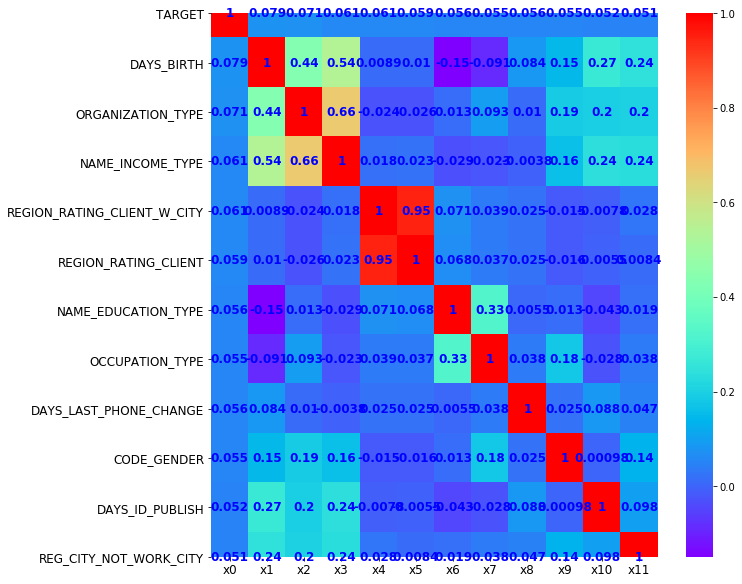

In [53]:
train_corr = train.corr() # 计算各变量的相关性系数
xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11'] # x轴标签
yticks = list(train_corr.index) # y轴标签
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(train_corr, annot=True, cmap='rainbow', ax=ax,
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'blue'}) # 绘制相关性系数热力图
ax.set_xticklabels(xticks, rotation=0, fontsize=12)
ax.set_yticklabels(yticks, rotation=0, fontsize=12)
plt.show()

上图可以看出变量之间的相关性都较小，但是 REGION_RATING_CLIENT_W_CITY 和 REGION_RATING_CLIENT 相对来说较大为0.95

<BarContainer object of 11 artists>

[Text(0, 0, 'x1'),
 Text(0, 0, 'x2'),
 Text(0, 0, 'x3'),
 Text(0, 0, 'x4'),
 Text(0, 0, 'x5'),
 Text(0, 0, 'x6'),
 Text(0, 0, 'x7'),
 Text(0, 0, 'x8'),
 Text(0, 0, 'x9'),
 Text(0, 0, 'x10'),
 Text(0, 0, 'x11')]

Text(0, 0.5, 'IV(Information Value)')

Text(1, 0.09463387621253481, '0.0846')

Text(2, 0.08083466301388871, '0.0708')

Text(3, inf, 'inf')

Text(4, 0.029381917528212197, '0.0194')

Text(5, 0.027870249141960957, '0.0179')

Text(6, 0.03828915271929715, '0.0283')

Text(7, 0.04926898220314894, '0.0393')

Text(8, 0.05737131394847526, '0.0474')

Text(9, 0.03766338008540664, '0.0277')

Text(10, 0.048450250626634474, '0.0385')

Text(11, 0.01, '0.0000')

posx and posy should be finite values
posx and posy should be finite values


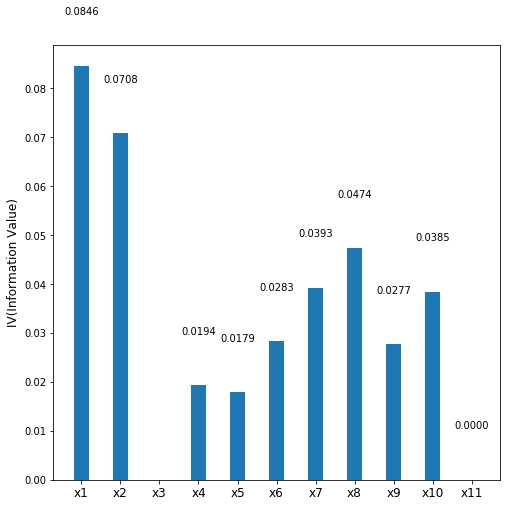

In [54]:
ivlist = [ivx1, ivx2, ivx3, ivx4, ivx5, ivx6, ivx7, ivx8, ivx9, ivx10, ivx11] # 各变量IV
index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10', 'x11'] # x轴的标签
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index)) + 1
ax1.bar(x, ivlist, width=0.4) # 生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=12)
# 在柱状图上添加数字标签
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

通过IV值判断变量预测能力的标准是：

小于0.02: unpredictive

0.02 to 0.1: weak

0.1 to 0.3: medium

0.3 to 0.5: strong

大于0.5: suspicious

NAME_INCOME_TYPE、REGION_RATING_CLIENT_W_CITY、REGION_RATING_CLIENT、REG_CITY_NOT_WORK_CITY变量的IV值明显较低

## 模型分析 

WOE转换:
    证据权重（Weight of Evidence,WOE）转换可以将Logistic回归模型转变为标准评分卡格式

In [55]:
# 替换成woe函数
def replace_woe(series, cut, woe):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut)-2
        m = len(cut)-2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [56]:
train

,TARGET,DAYS_BIRTH,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
231827,0,-8903,42,4,3,3,3,10,-549.0,2,-1586,0
26601,0,-22036,9,2,2,2,3,10,0.0,1,-4048,0
226034,0,-13656,42,4,1,2,3,12,-29.0,1,-2039,0
191570,0,-18239,43,4,1,1,3,3,-1928.0,1,-1773,0
89837,0,-22079,9,2,1,1,3,10,-506.0,1,-2415,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192476,0,-16362,42,4,2,2,3,16,-1560.0,2,-4307,0
17730,0,-14602,42,5,2,2,3,2,-694.0,2,-4432,0
28030,0,-14769,46,5,1,1,3,12,-1811.0,1,-3291,0
277869,1,-11568,43,5,3,3,1,12,-1616.0,1,-2188,0


In [57]:
from pandas import Series
train = pd.read_csv("TrainData.csv")
train['DAYS_BIRTH'] = Series(replace_woe(train['DAYS_BIRTH'], cutx1, woex1))
train['ORGANIZATION_TYPE'] = Series(replace_woe(train['ORGANIZATION_TYPE'], cutx2, woex2))
train['NAME_INCOME_TYPE'] = Series(replace_woe(train['NAME_INCOME_TYPE'], cutx3, woex3))
train['REGION_RATING_CLIENT_W_CITY'] = Series(replace_woe(train['REGION_RATING_CLIENT_W_CITY'], cutx4, woex4))
train['REGION_RATING_CLIENT'] = Series(replace_woe(train['REGION_RATING_CLIENT'], cutx5, woex5))
train['NAME_EDUCATION_TYPE'] = Series(replace_woe(train['NAME_EDUCATION_TYPE'], cutx6, woex6))
train['OCCUPATION_TYPE'] = Series(replace_woe(train['OCCUPATION_TYPE'], cutx7, woex7))
train['DAYS_LAST_PHONE_CHANGE'] = Series(replace_woe(train['DAYS_LAST_PHONE_CHANGE'], cutx8, woex8))
train['CODE_GENDER'] = Series(replace_woe(train['CODE_GENDER'], cutx9, woex9))
train['DAYS_ID_PUBLISH'] = Series(replace_woe(train['DAYS_ID_PUBLISH'], cutx10, woex10))
train['REG_CITY_NOT_WORK_CITY'] = Series(replace_woe(train['REG_CITY_NOT_WORK_CITY'], cutx11, woex11))
train.to_csv('Woetrain.csv', index=False)

In [58]:
test = pd.read_csv("TestData.csv")
# 替换成woe
test['DAYS_BIRTH'] = Series(replace_woe(test['DAYS_BIRTH'], cutx1, woex1))
test['ORGANIZATION_TYPE'] = Series(replace_woe(test['ORGANIZATION_TYPE'], cutx2, woex2))
test['NAME_INCOME_TYPE'] = Series(replace_woe(test['NAME_INCOME_TYPE'], cutx3, woex3))
test['REGION_RATING_CLIENT_W_CITY'] = Series(replace_woe(test['REGION_RATING_CLIENT_W_CITY'], cutx4, woex4))
test['REGION_RATING_CLIENT'] = Series(replace_woe(test['REGION_RATING_CLIENT'], cutx5, woex5))
test['NAME_EDUCATION_TYPE'] = Series(replace_woe(test['NAME_EDUCATION_TYPE'], cutx6, woex6))
test['OCCUPATION_TYPE'] = Series(replace_woe(test['OCCUPATION_TYPE'], cutx7, woex7))
test['DAYS_LAST_PHONE_CHANGE'] = Series(replace_woe(test['DAYS_LAST_PHONE_CHANGE'], cutx8, woex8))
test['CODE_GENDER'] = Series(replace_woe(test['CODE_GENDER'], cutx9, woex9))
test['DAYS_ID_PUBLISH'] = Series(replace_woe(test['DAYS_ID_PUBLISH'], cutx10, woex10))
test['REG_CITY_NOT_WORK_CITY'] = Series(replace_woe(test['REG_CITY_NOT_WORK_CITY'], cutx11, woex11))
test.to_csv('TestWoeData.csv', index=False)

## 模型预测 

In [59]:
from sklearn.model_selection import cross_val_score

def cvDictGen(functions, scr, X_train=X_train, Y_train=Y_train, cv=10, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, Y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[list(cvDict.keys())[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[list(cvDict.keys())[0]][1]))]
    return cvDictNormalized

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [62]:
lrMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [63]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [64]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [65]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

In [66]:
cvD = cvDictGen(functions=[knMod, lrMod, adaMod, gbMod, rfMod], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


In [67]:
cvD

{'KNeighborsClassifier': [0.5201849587542037, 0.005986724090749411],
 'LogisticRegression': [0.6517724032696096, 0.005243865529467032],
 'AdaBoostClassifier': [0.6557351615518378, 0.006249690845306717],
 'GradientBoostingClassifier': [0.6584523970438549, 0.006745490606044773],
 'RandomForestClassifier': [0.5647083562240238, 0.00724134251513311]}

In [68]:
cvDictNormalize(cvD)

{'KNeighborsClassifier': ['1.00', '1.00'],
 'LogisticRegression': ['1.25', '0.88'],
 'AdaBoostClassifier': ['1.26', '1.04'],
 'GradientBoostingClassifier': ['1.27', '1.13'],
 'RandomForestClassifier': ['1.09', '1.21']}

LogisticRegression的out-of-the-bag较好

## 最优化超参数 

尝试LR、AdaBoost和GB

AdaBoost模型

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [70]:
ada_param = {'n_estimators': [10,50,100,200,400],
                 'learning_rate': [0.1, 0.05]}

In [71]:
randomizedSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=ada_param, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, Y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=400, learning_rate=0.05 ............................
[CV] ............. n_estimators=400, learning_rate=0.05, total= 1.3min
[CV] n_estimators=400, learning_rate=0.05 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ............. n_estimators=400, learning_rate=0.05, total= 1.2min
[CV] n_estimators=400, learning_rate=0.05 ............................
[CV] ............. n_estimators=400, learning_rate=0.05, total= 1.2min
[CV] n_estimators=10, learning_rate=0.1 ..............................
[CV] ............... n_estimators=10, learning_rate=0.1, total=   1.8s
[CV] n_estimators=10, learning_rate=0.1 ..............................
[CV] ............... n_estimators=10, learning_rate=0.1, total=   1.8s
[CV] n_estimators=10, learning_rate=0.1 ..............................
[CV] ............... n_estimators=10, learning_rate=0.1, total=   1.8s
[CV] n_estimators=10, learning_rate=0.05 .............................
[CV] .............. n_estimators=10, learning_rate=0.05, total=   1.8s
[CV] n_estimators=10, learning_rate=0.05 .............................
[CV] .............. n_estimators=10, learning_rate=0.05, total=   1.8s
[CV] n_estimators=10, learning_rate=0.05 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  9.2min finished


In [72]:
randomizedSearchAda.best_params_, randomizedSearchAda.best_score_

({'n_estimators': 400, 'learning_rate': 0.1}, 0.655482234998929)

GB模型

In [73]:
gbParams = {'loss' : ['deviance', 'exponential'],
            'n_estimators': [10,50,100,200,400],
            'max_depth': randint(1,5),
            'learning_rate':[0.1, 0.05]}

In [74]:
randomizedSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, Y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=400 .
[CV]  learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=400, total= 1.3min
[CV] learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=400 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=400, total= 1.3min
[CV] learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=400 .
[CV]  learning_rate=0.1, loss=deviance, max_depth=3, n_estimators=400, total= 1.2min
[CV] learning_rate=0.1, loss=deviance, max_depth=1, n_estimators=100 .
[CV]  learning_rate=0.1, loss=deviance, max_depth=1, n_estimators=100, total=   7.3s
[CV] learning_rate=0.1, loss=deviance, max_depth=1, n_estimators=100 .
[CV]  learning_rate=0.1, loss=deviance, max_depth=1, n_estimators=100, total=   7.3s
[CV] learning_rate=0.1, loss=deviance, max_depth=1, n_estimators=100 .
[CV]  learning_rate=0.1, loss=deviance, max_depth=1, n_estimators=100, total=   7.4s
[CV] learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=200 
[CV]  learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=200, total=  36.5s
[CV] learning_rate=0.1, loss=exponential, max_depth=3, n_estimators=200 
[CV]  learning_rate=0.1, loss=exponential, max_depth=3, n

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 15.5min finished


In [75]:
randomizedSearchGB.best_params_, randomizedSearchGB.best_score_

({'learning_rate': 0.1,
  'loss': 'exponential',
  'max_depth': 3,
  'n_estimators': 200},
 0.6567088341150991)

In [76]:
bestGbModFitted = randomizedSearchGB.best_estimator_.fit(X_train, Y_train)

In [77]:
bestAdaModFitted = randomizedSearchAda.best_estimator_.fit(X_train, Y_train)

In [78]:
cvDictHPO = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.9min finished


In [79]:
cvDictNormalize(cvDictHPO)

{'GradientBoostingClassifier': ['1.00', '1.00'],
 'AdaBoostClassifier': ['1.00', '0.83']}

In [80]:
def plotCvRocCurve(X, y, classifier, nfolds=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interp

    cv = StratifiedKFold(n_splits=nfolds)
    cv = cv.split(X, y)
    #cv = StratifiedKFold(y, n_splits=nfolds)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr = mean_tpr/len(list(cv))
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    plt.show()

def rocZeroOne(y_true, y_predicted_porba):
    
    from sklearn.metrics import roc_curve
    from scipy.spatial.distance import euclidean
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predicted_porba[:, 1])
    
    best = [0, 1]
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append([euclidean([x,y], best)])

    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print('\n' + 'ROC曲线最佳点位置: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
    print('\n' + '最佳截止点: {:0.4f}'.format(bestCutOff1))

    plt.plot(dist)
    plt.xlabel('Index')
    plt.ylabel('Euclidean Distance to the perfect [0,1]')
    fig = plt.gcf()
    fig.set_size_inches(15,5)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


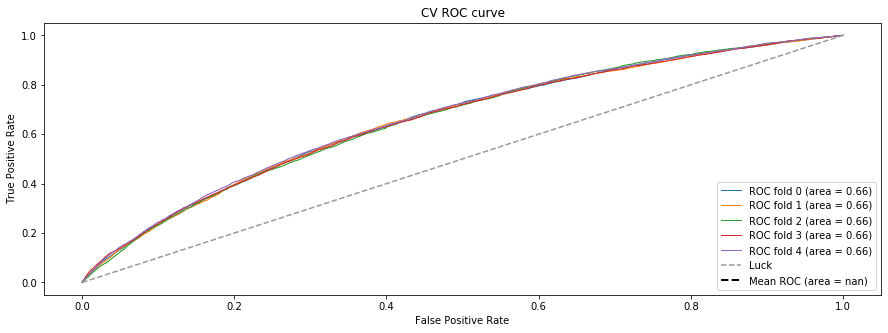

In [81]:
plotCvRocCurve(X, Y, randomizedSearchGB.best_estimator_)


ROC曲线最佳点位置: TPR = 65.026%, FPR = 40.377%

最佳截止点: 0.0766


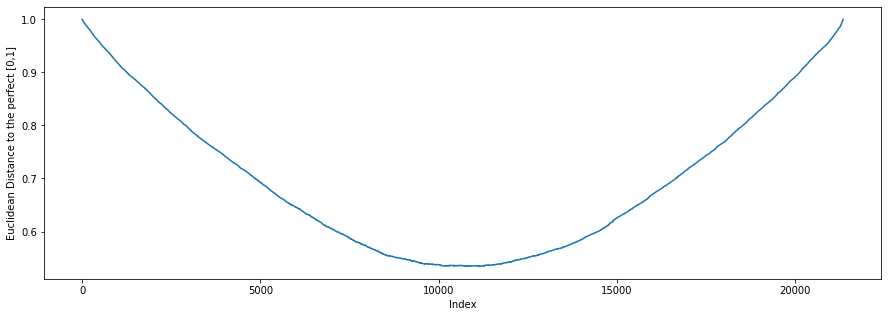

In [82]:
rocZeroOne(Y_test, randomizedSearchGB.predict_proba(X_test))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


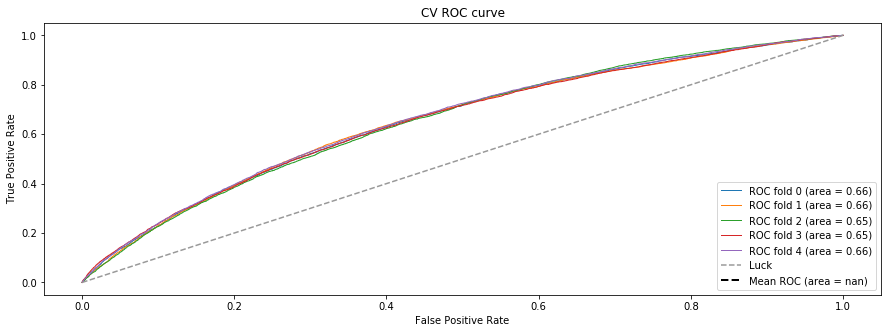

In [83]:
plotCvRocCurve(X, Y, randomizedSearchAda.best_estimator_)


ROC曲线最佳点位置: TPR = 63.314%, FPR = 40.332%

最佳截止点: 0.4847


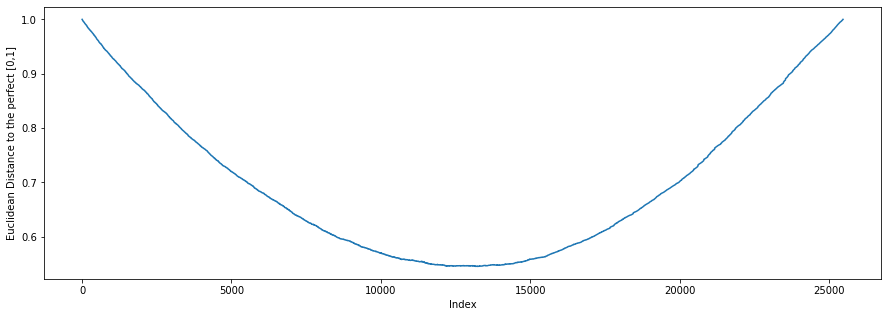

In [84]:
rocZeroOne(Y_test, randomizedSearchAda.predict_proba(X_test))

LR模型

In [85]:
data = pd.read_csv('Woetrain.csv')

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


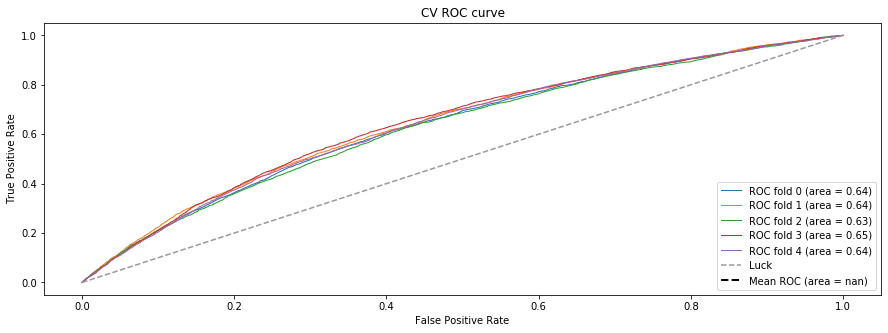

In [86]:
#因变量
data_Y = data['TARGET']
#自变量，剔除对因变量影响不明显的变量NAME_INCOME_TYPE、REGION_RATING_CLIENT_W_CITY、REGION_RATING_CLIENT、REG_CITY_NOT_WORK_CITY
data_X = data.drop(['TARGET','NAME_INCOME_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','REG_CITY_NOT_WORK_CITY'],axis=1)
plotCvRocCurve(data_X, data_Y, lrMod.fit(data_X, data_Y))


ROC曲线最佳点位置: TPR = 60.793%, FPR = 40.245%

最佳截止点: 0.0815


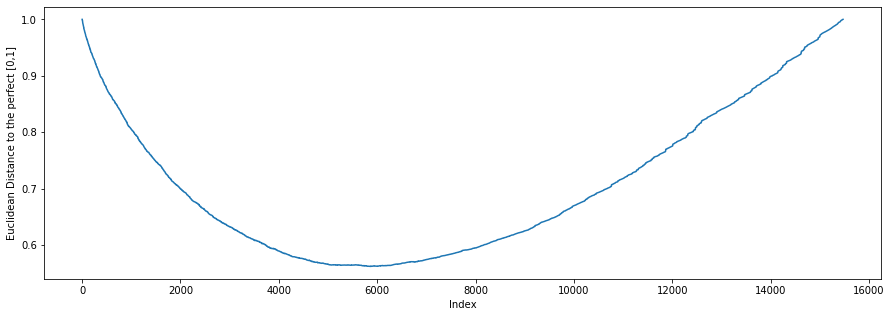

In [87]:
Y_test = test['TARGET']
X_test = test.drop(['TARGET','NAME_INCOME_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','REG_CITY_NOT_WORK_CITY'], axis=1)
rocZeroOne(Y_test, lrMod.predict_proba(X_test))

In [88]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
# 导入数据
data = pd.read_csv('Woetrain.csv')
#因变量
Y = data['TARGET']
#自变量，剔除对因变量影响不明显的变量
X = data.drop(['TARGET','NAME_INCOME_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','REG_CITY_NOT_WORK_CITY'],axis=1)
X1 = sm.add_constant(X)
logit = sm.Logit(Y, X1)
result = logit.fit()
print(result.summary())

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.270597
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               215257
Model:                          Logit   Df Residuals:                   215249
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Jul 2021   Pseudo R-squ.:                 0.03197
Time:                        01:08:14   Log-Likelihood:                -58248.
converged:                       True   LL-Null:                       -60172.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.6644      0.012   -226.033      0.000      -2.687      

逻辑回归常数项为-2.6644，DAYS_BIRTH系数为0.7708，ORGANIZATION_TYPE系数为0.4648，NAME_EDUCATION_TYPE系数为1.2614，OCCUPATION_TYPE系数为0.5346，DAYS_LAST_PHONE_CHANGE系数为0.8268，CODE_GENDER系数为1.0966，DAYS_ID_PUBLISH系数为0.5601。
在5%的置信度下即95%的置信区间，系数是显著的。

(0, 1)

(0, 1)

Text(0, 0.5, '真正率')

Text(0.5, 0, '假正率')

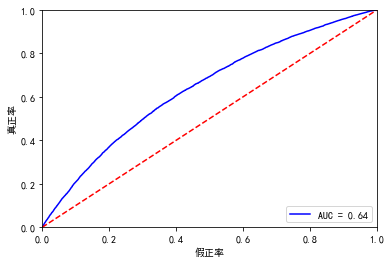

In [91]:
plt.rcParams['font.sans-serif'] = ['SimHei']
test = pd.read_csv('TestWoeData.csv')
Y_test = test['TARGET']
X_test = test.drop(['TARGET','NAME_INCOME_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','REG_CITY_NOT_WORK_CITY'],axis=1)
X3 = sm.add_constant(X_test)
resu = result.predict(X3)
fpr, tpr, threshold = roc_curve(Y_test, resu)
rocauc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()

In [92]:
import math
# coe为逻辑回归模型的系数
coe = [-2.6644, 0.7708, 0.4648, 1.2614, 0.5346, 0.8268, 1.0966, 0.5601]
p = 20 / math.log(2)
q = 600 - 20 * math.log(20) / math.log(2)
baseScore = round(q + p * coe[0], 0)

In [93]:
baseScore

437.0

In [94]:
def get_score(coe, woe, factor):
    scores = []
    for w in woe:
        score = round(coe * w * factor, 0)
        scores.append(score)
    return scores

In [95]:
x1 = get_score(coe[1], woex1, p)
x2 = get_score(coe[2], woex2, p)
x6 = get_score(coe[3], woex6, p)
x7 = get_score(coe[4], woex7, p)
x8 = get_score(coe[5], woex8, p)
x9 = get_score(coe[6], woex9, p)
x10 = get_score(coe[7], woex10, p)

In [96]:
print(x1, x2, x6, x7, x8, x9, x10)

[-12.0, -9.0, -5.0, -2.0, -1.0, 1.0, 5.0, 7.0, 9.0] [-6.0, -6.0, -3.0, -1.0, 1.0, 2.0, 2.0, 3.0, 5.0] [-9.0, 4.0, 4.0] [-5.0, -0.0, -0.0, 4.0] [-10.0, -7.0, -4.0, 0.0, 3.0, 4.0, 4.0, 5.0] [-5.0, -4.0, 0.0, 8.0] [-5.0, -5.0, -2.0, -0.0, 1.0, 2.0, 3.0, 4.0]


In [97]:
def compute_score(series, cut, score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

In [98]:
test1 = pd.read_csv('TestData.csv')
test1['BaseScore'] = Series(np.zeros(len(test1))) + baseScore
test1['x1'] = Series(compute_score(test1['DAYS_BIRTH'], cutx1, x1))
test1['x2'] = Series(compute_score(test1['ORGANIZATION_TYPE'], cutx2, x2))
test1['x6'] = Series(compute_score(test1['NAME_EDUCATION_TYPE'], cutx6, x6))
test1['x7'] = Series(compute_score(test1['OCCUPATION_TYPE'], cutx7, x7))
test1['x8'] = Series(compute_score(test1['DAYS_LAST_PHONE_CHANGE'], cutx8, x8))
test1['x9'] = Series(compute_score(test1['CODE_GENDER'], cutx9, x9))
test1['x10'] = Series(compute_score(test1['DAYS_ID_PUBLISH'], cutx10, x10))
test1['Score'] = test1['x1'] + test1['x2'] + test1['x6'] + test1['x7'] +test1['x8'] + test1['x9'] + test1['x10'] + baseScore
test1.to_csv('ScoreData.csv', index=False)

In [99]:
ScoreData = pd.read_csv("ScoreData.csv")

In [100]:
ScoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92254 entries, 0 to 92253
Data columns (total 21 columns):
TARGET                         92254 non-null int64
DAYS_BIRTH                     92254 non-null int64
ORGANIZATION_TYPE              92254 non-null int64
NAME_INCOME_TYPE               92254 non-null int64
REGION_RATING_CLIENT_W_CITY    92254 non-null int64
REGION_RATING_CLIENT           92254 non-null int64
NAME_EDUCATION_TYPE            92254 non-null int64
OCCUPATION_TYPE                92254 non-null int64
DAYS_LAST_PHONE_CHANGE         92254 non-null float64
CODE_GENDER                    92254 non-null int64
DAYS_ID_PUBLISH                92254 non-null int64
REG_CITY_NOT_WORK_CITY         92254 non-null int64
BaseScore                      92254 non-null float64
x1                             92254 non-null float64
x2                             92254 non-null float64
x6                             92254 non-null float64
x7                             92254 non-null flo

In [106]:
ScoreData[ScoreData.TARGET == 0].sort_values(by='Score',ascending = False)

,TARGET,DAYS_BIRTH,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,...,REG_CITY_NOT_WORK_CITY,BaseScore,x1,x2,x6,x7,x8,x9,x10,Score
10128,0,-8095,53,5,2,2,3,10,0.0,2,...,0,437.0,9.0,5.0,4.0,4.0,5.0,8.0,4.0,476.0
49649,0,-8096,47,4,2,2,3,10,0.0,2,...,1,437.0,9.0,5.0,4.0,4.0,5.0,8.0,4.0,476.0
20143,0,-7749,46,5,2,2,3,12,0.0,2,...,1,437.0,9.0,5.0,4.0,4.0,5.0,8.0,4.0,476.0
73170,0,-8157,47,5,2,2,3,15,0.0,2,...,0,437.0,9.0,5.0,4.0,4.0,5.0,8.0,4.0,476.0
67245,0,-8249,46,4,2,2,3,12,0.0,2,...,1,437.0,9.0,5.0,4.0,4.0,5.0,8.0,4.0,476.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80058,0,-23172,13,3,2,2,1,2,-2545.0,1,...,0,437.0,-12.0,-3.0,-9.0,-5.0,-10.0,0.0,-5.0,393.0
68174,0,-22503,13,3,1,1,1,3,-2270.0,1,...,1,437.0,-12.0,-3.0,-9.0,-5.0,-10.0,0.0,-5.0,393.0
72786,0,-22782,13,5,2,2,1,3,-2357.0,1,...,0,437.0,-12.0,-3.0,-9.0,-5.0,-10.0,0.0,-5.0,393.0
33525,0,-22304,5,3,2,2,1,3,-1751.0,1,...,0,437.0,-12.0,-6.0,-9.0,-5.0,-7.0,0.0,-5.0,393.0


In [109]:
ScoreData[ScoreData.TARGET == 0]['Score'].describe()

count    84717.000000
mean       439.488863
std         14.701379
min        393.000000
25%        429.000000
50%        439.000000
75%        450.000000
max        476.000000
Name: Score, dtype: float64

In [105]:
ScoreData[ScoreData.TARGET == 1].sort_values(by='Score',ascending = False)

,TARGET,DAYS_BIRTH,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,...,REG_CITY_NOT_WORK_CITY,BaseScore,x1,x2,x6,x7,x8,x9,x10,Score
48765,1,-8363,46,5,2,2,3,12,0.0,2,...,0,437.0,9.0,5.0,4.0,4.0,5.0,8.0,4.0,476.0
65920,1,-9517,46,4,2,2,4,16,-248.0,2,...,0,437.0,9.0,5.0,4.0,4.0,4.0,8.0,4.0,475.0
55572,1,-8263,46,5,3,3,4,17,-6.0,2,...,0,437.0,9.0,5.0,4.0,4.0,4.0,8.0,4.0,475.0
76145,1,-8548,46,4,2,2,3,10,0.0,2,...,1,437.0,9.0,5.0,4.0,4.0,5.0,8.0,3.0,475.0
85814,1,-8665,46,4,2,2,3,17,0.0,2,...,1,437.0,9.0,5.0,4.0,4.0,5.0,8.0,3.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1,-22907,9,2,2,2,1,10,-2514.0,1,...,0,437.0,-12.0,-6.0,-9.0,4.0,-10.0,0.0,-5.0,399.0
74997,1,-22023,5,4,2,2,1,10,-2936.0,1,...,0,437.0,-12.0,-6.0,-9.0,4.0,-10.0,0.0,-5.0,399.0
65222,1,-21391,22,5,2,2,1,2,-2602.0,1,...,0,437.0,-9.0,-1.0,-9.0,-5.0,-10.0,0.0,-5.0,398.0
31386,1,-22504,22,3,2,2,1,2,-1876.0,1,...,0,437.0,-12.0,-1.0,-9.0,-5.0,-7.0,0.0,-5.0,398.0


In [110]:
ScoreData[ScoreData.TARGET == 1]['Score'].describe()

count    7537.000000
mean      446.566671
std        14.144625
min       393.000000
25%       437.000000
50%       448.000000
75%       457.000000
max       476.000000
Name: Score, dtype: float64